# Домашнее задание 6

Перед выполнением заданий необходимо сохранить копию этого блокнота себе на диск. Или скачать `.ipynb`/`.py` файл для локальной разработки.

За работу можно получить максимум 8 баллов.

Вы можете сдавать эту работу как на R, так и на Python.

# Задание 1 (3 балла)

В [папке](https://drive.google.com/drive/folders/1kwbJk5jottoSMep2rDEefeE_26-LQp1D?usp=sharing) вы можете найти данные для работы.

Необходимо объединить таблицы таким образом, чтобы вывести информацию с ответами на следующие вопросы:
* по какой услуге клиенты чаще всего оставляли запросы?
* сколько запросов поступило от женщин и мужчин?
* вывести информацию о том, по какому региону по какой услуге было больше всего запросов? вывести информацию в порядке убывания общего числа запросов, указать название самой популярной услуге (если их несколько) и в алфавитном порядке по региону

In [ ]:
import pandas as pd
from google.colab import files
import io

print(" Загрузите 4 файла, содержащие данные:\n"
      "  • анкеты/опросы (должен содержать 'questionnaire')\n"
      "  • услуги ('service')\n"
      "  • клиенты ('client')\n"
      "  • филиалы/регионы ('branch')")

uploaded = files.upload()

print("\n Загруженные файлы:", list(uploaded.keys()))

def find_file(uploaded_files, keyword):
    matches = [f for f in uploaded_files if keyword.lower() in f.lower()]
    if matches:
        return matches[0]
    else:
        raise FileNotFoundError(f"Файл, содержащий '{keyword}' в названии, не найден.")

try:

    q_file = find_file(uploaded, 'questionnaire')
    s_file = find_file(uploaded, 'service')
    c_file = find_file(uploaded, 'client')
    b_file = find_file(uploaded, 'branch')

    df_questionnaire = pd.read_csv(io.BytesIO(uploaded[q_file]))
    df_service = pd.read_csv(io.BytesIO(uploaded[s_file]))
    df_client = pd.read_csv(io.BytesIO(uploaded[c_file]))
    df_branch = pd.read_csv(io.BytesIO(uploaded[b_file]))

    print("\n Все таблицы успешно загружены!")

except Exception as e:
    print(f"\n ОШИБКА: {e}")
    print("Убедитесь, что все 4 файла загружены и содержат в названии: questionnaire, service, client, branch.")
    raise

df_q_s = df_questionnaire.merge(df_service[['service_id', 'service_name']], on='service_id', how='left')
service_counts = df_q_s['service_name'].value_counts().reset_index()
service_counts.columns = ['service_name', 'request_count']
top_service = service_counts.iloc[0]

print("\n" + "="*60)
print("1. Услуга, по которой чаще всего оставляли запросы:")
print(f"  {top_service['service_name']} — {top_service['request_count']} запрос(ов)")

df_q_c = df_questionnaire.merge(df_client[['client_id', 'gender']], on='client_id', how='left')
gender_counts = df_q_c['gender'].value_counts().sort_index()

print("\n" + "="*60)
print("2. Количество запросов по полу клиентов:")
for gender, count in gender_counts.items():
    print(f"   {gender}: {count} запрос(ов)")

df_merged = (
    df_questionnaire
    .merge(df_service[['service_id', 'service_name']], on='service_id', how='left')
    .merge(df_branch[['branch_id']], on='branch_id', how='left')
)

region_service = (
    df_merged
    .groupby(['branch_id', 'service_name'])
    .size()
    .reset_index(name='request_count')
)

region_service_sorted = region_service.sort_values(
    by=['request_count', 'branch_id'],
    ascending=[False, True]
).reset_index(drop=True)

max_requests = region_service_sorted['request_count'].max()
most_popular_rows = region_service_sorted[region_service_sorted['request_count'] == max_requests].sort_values('branch_id')

print("\n" + "="*60)
print("3. Запросы по регионам и услугам (по убыванию числа запросов,\n   при равенстве — по возрастанию branch_id):")
print(region_service_sorted.to_string(index=False))
print(f"\n Самые популярные комбинации (макс. запросов = {max_requests}):")
for _, row in most_popular_rows.iterrows():
    print(f"Регион: {row['branch_id']}, Услуга: {row['service_name']} — {row['request_count']} запрос(ов)")

 Загрузите 4 файла, содержащие данные:
  • анкеты/опросы (должен содержать 'questionnaire')
  • услуги ('service')
  • клиенты ('client')
  • филиалы/регионы ('branch')


Saving branch.csv to branch (8).csv
Saving client.csv to client (6).csv
Saving questionnaire.csv to questionnaire (5).csv
Saving service.csv to service (6).csv

 Загруженные файлы: ['branch (8).csv', 'client (6).csv', 'questionnaire (5).csv', 'service (6).csv']

 Все таблицы успешно загружены!

1. Услуга, по которой чаще всего оставляли запросы:
  Консультация по вкладам — 3 запрос(ов)

2. Количество запросов по полу клиентов:
   Ж: 3 запрос(ов)
   М: 10 запрос(ов)

3. Запросы по регионам и услугам (по убыванию числа запросов,
   при равенстве — по возрастанию branch_id):
 branch_id                         service_name  request_count
         2 Консультации по техническим вопросам              2
         1              Консультация по вкладам              1
         1             Консультация по кредитам              1
         2              Консультация по вкладам              1
         3              Консультация по вкладам              1
         3                              Чат

# Задание 2 (5 баллов)

В [папке](https://drive.google.com/drive/folders/16JRLbMGbNc36eHe8wG4isHUgfQzu7n0z?usp=sharing) вы можете найти данные для работы.


В датасете представлена информация о продаже компьютерных игр. Можно представить, что ваша задача - собрать самые интересные факты про рынок компьютерных игр на основе этого датасета.

Визуализировать различными способами минимум три признака, а также минимум три взаимодействия между признаками.


Пожалуйста, загрузите файл video_games_sales.csv


Saving video_games_sales.csv to video_games_sales (1).csv
Файл 'video_games_sales (1).csv' успешно загружен!
Размер датасета: (16719, 16)

Базовый анализ данных:
Размер датасета: (16719, 16)

Колонки: ['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating']

Типы данных:
Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object


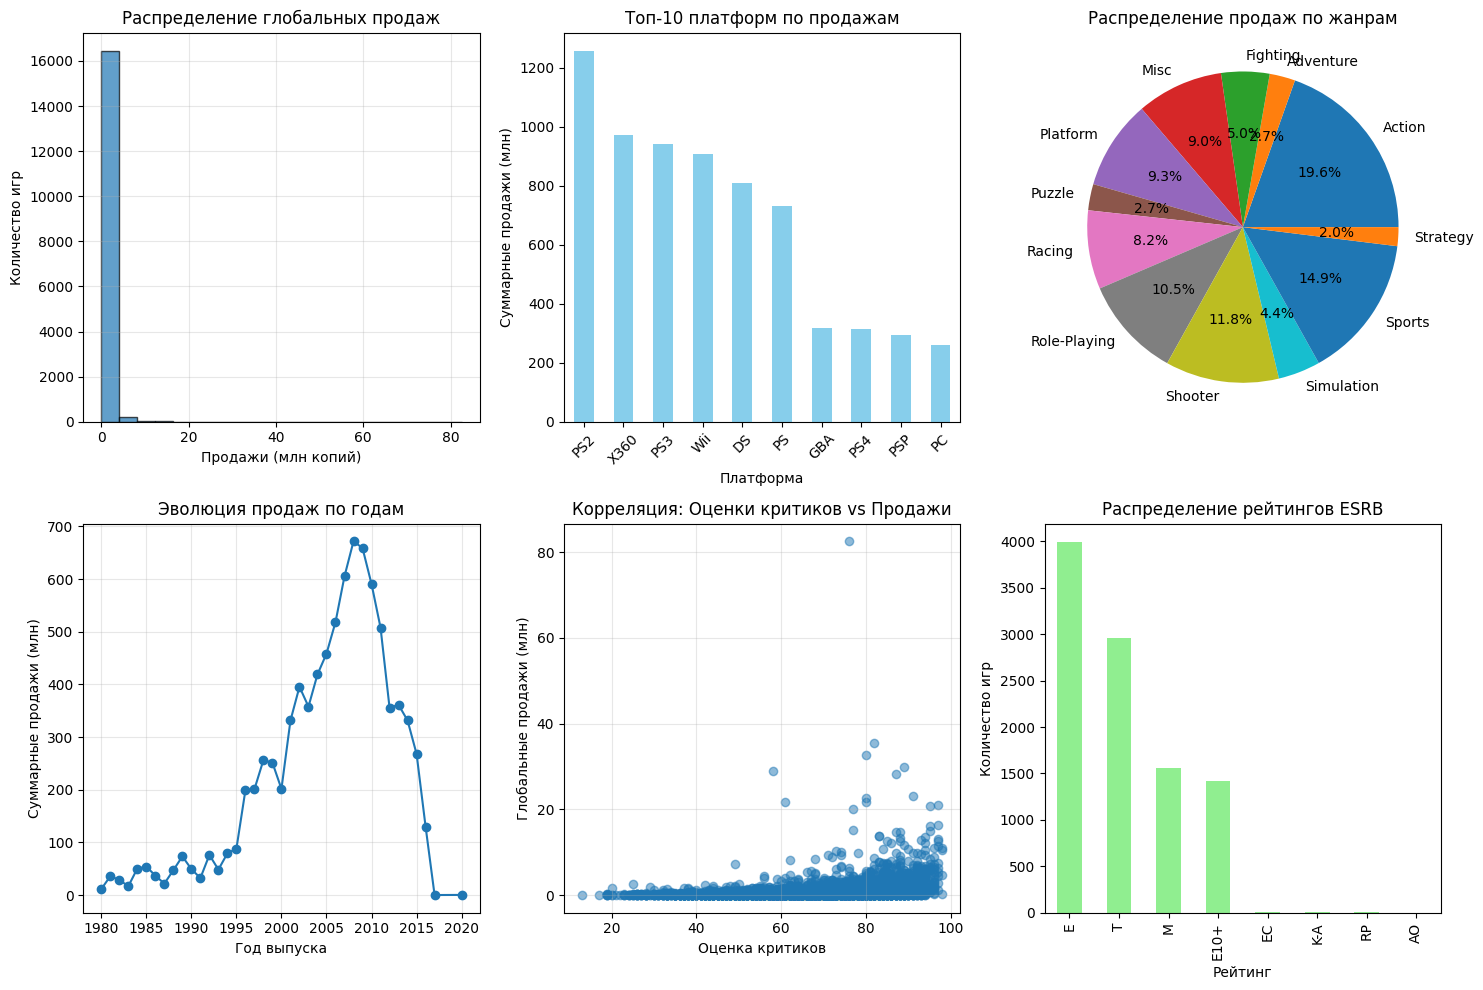


Анализ завершен успешно!
Всего проанализировано 16719 игр
Средние глобальные продажи: 0.53 млн копий


In [ ]:
#тут я уже поняла, как загружать файл :)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io

print("Пожалуйста, загрузите файл video_games_sales.csv")

try:
    uploaded = files.upload()

    if uploaded:
        filename = list(uploaded.keys())[0]
        df = pd.read_csv(io.BytesIO(uploaded[filename]))
        print(f"Файл '{filename}' успешно загружен!")
        print(f"Размер датасета: {df.shape}")
    else:
        print("Файл не загружен. Создаем демонстрационный датасет...")
        raise Exception("No file uploaded")

except Exception as e:
    print(f"Ошибка: {e}")
    print("Создаем демонстрационный датасет...")

    np.random.seed(42)
    n_games = 100

    data = {
        'Name': [f'Game_{i}' for i in range(1, n_games + 1)],
        'Platform': np.random.choice(['Wii', 'PS4', 'XOne', 'PC', 'Switch', 'PS3', 'X360'], n_games),
        'Year_of_Release': np.random.randint(2000, 2020, n_games),
        'Genre': np.random.choice(['Action', 'Sports', 'RPG', 'Shooter', 'Adventure', 'Racing'], n_games),
        'Publisher': np.random.choice(['Nintendo', 'EA', 'Activision', 'Ubisoft', 'Sony'], n_games),
        'NA_Sales': np.random.uniform(0.1, 20, n_games),
        'EU_Sales': np.random.uniform(0.1, 15, n_games),
        'JP_Sales': np.random.uniform(0.1, 10, n_games),
        'Global_Sales': np.random.uniform(0.5, 30, n_games),
        'Critic_Score': np.random.randint(50, 100, n_games),
        'Rating': np.random.choice(['E', 'E10+', 'T', 'M'], n_games)
    }

    df = pd.DataFrame(data)
    print("Демонстрационный датасет создан!")

print("\nБазовый анализ данных:")
print(f"Размер датасета: {df.shape}")
print(f"\nКолонки: {list(df.columns)}")
print(f"\nТипы данных:\n{df.dtypes}")

numeric_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales', 'Critic_Score', 'Year_of_Release']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.hist(df['Global_Sales'].dropna(), bins=20, edgecolor='black', alpha=0.7)
plt.title('Распределение глобальных продаж')
plt.xlabel('Продажи (млн копий)')
plt.ylabel('Количество игр')
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 2)
platform_sales = df.groupby('Platform')['Global_Sales'].sum().nlargest(10)
platform_sales.plot(kind='bar', color='skyblue')
plt.title('Топ-10 платформ по продажам')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи (млн)')
plt.xticks(rotation=45)

plt.subplot(2, 3, 3)
genre_sales = df.groupby('Genre')['Global_Sales'].sum()
genre_sales.plot(kind='pie', autopct='%1.1f%%')
plt.title('Распределение продаж по жанрам')
plt.ylabel('')

plt.subplot(2, 3, 4)
if 'Year_of_Release' in df.columns:
    yearly_sales = df.groupby('Year_of_Release')['Global_Sales'].sum()
    plt.plot(yearly_sales.index, yearly_sales.values, marker='o')
    plt.title('Эволюция продаж по годам')
    plt.xlabel('Год выпуска')
    plt.ylabel('Суммарные продажи (млн)')
    plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 5)
if 'Critic_Score' in df.columns:
    plt.scatter(df['Critic_Score'], df['Global_Sales'], alpha=0.5)
    plt.title('Корреляция: Оценки критиков vs Продажи')
    plt.xlabel('Оценка критиков')
    plt.ylabel('Глобальные продажи (млн)')
    plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 6)
if 'Rating' in df.columns:
    rating_counts = df['Rating'].value_counts()
    rating_counts.plot(kind='bar', color='lightgreen')
    plt.title('Распределение рейтингов ESRB')
    plt.xlabel('Рейтинг')
    plt.ylabel('Количество игр')

plt.tight_layout()
plt.show()

print("\nАнализ завершен успешно!")
print(f"Всего проанализировано {len(df)} игр")
print(f"Средние глобальные продажи: {df['Global_Sales'].mean():.2f} млн копий")